In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from math import radians, cos, sin, asin, sqrt
import datetime
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="ticks")
%matplotlib inline

Download the data from

https://drive.google.com/open?id=0B28c493CP9GtMzN1emFoMkJNNlU

In [6]:
data=pd.read_csv("hubway_data/hubway_trips.csv")
data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,7/28/2011 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,7/28/2011 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,7/28/2011 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,7/28/2011 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,7/28/2011 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female


In [5]:
data.shape

(1579025, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579025 entries, 0 to 1579024
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   seq_id      1579025 non-null  int64  
 1   hubway_id   1579025 non-null  int64  
 2   status      1579025 non-null  object 
 3   duration    1579025 non-null  int64  
 4   start_date  1579025 non-null  object 
 5   strt_statn  1579011 non-null  float64
 6   end_date    1579025 non-null  object 
 7   end_statn   1578980 non-null  float64
 8   bike_nr     1578559 non-null  object 
 9   subsc_type  1579025 non-null  object 
 10  zip_code    1106259 non-null  object 
 11  birth_date  350644 non-null   float64
 12  gender      1106414 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 156.6+ MB


#### Who? Who’s using the bikes?
Refine into specific hypotheses:

• More men or more women?

• Older or younger people?

• Subscribers or one time users?

In [20]:
gender_counts=np.unique(data["gender"].replace(np.NaN,"NaN",regex=True).values,return_counts=True)
gender_counts

(array(['Female', 'Male', 'NaN'], dtype=object),
 array([271700, 834714, 472611]))

In [46]:
age_data=2020.0-data["birth_date"].dropna().values
age_data

array([44., 54., 77., ..., 44., 33., 35.])

In [61]:
data["subsc_type"].describe()

count        1579025
unique             2
top       Registered
freq         1106414
Name: subsc_type, dtype: object

Text(0.5, 1.0, 'Users by Age')

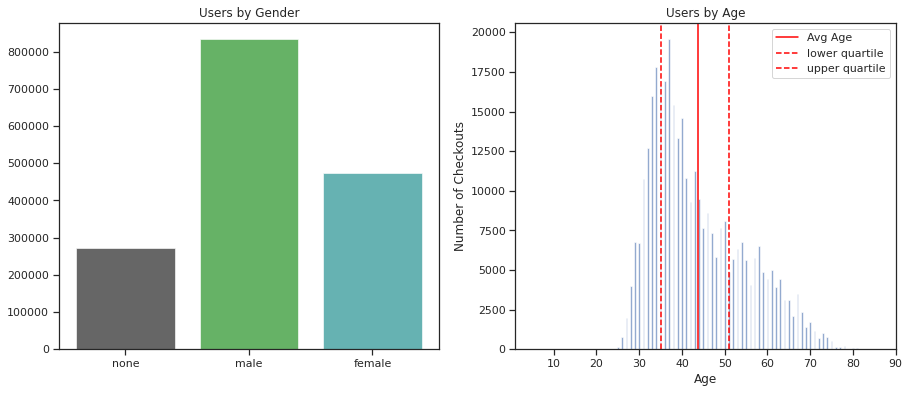

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))


ax[0].bar(range(3),gender_counts[1],align="center",color=["black","green","teal"],alpha=0.6)
ax[0].set_xticks([0, 1, 2])
ax[0].set_xticklabels(['none', 'male', 'female', ' '])
ax[0].set_title('Users by Gender')

age_counts=np.unique(age_data,return_counts=True)
ax[1].bar(age_counts[0],age_counts[1],align="center",width=0.4,alpha=0.6)
ax[1].axvline(x=np.mean(age_data),color="red",label="Avg Age")
ax[1].axvline(x=np.percentile(age_data, 25), color='red', linestyle='--', label='lower quartile')
ax[1].axvline(x=np.percentile(age_data, 75), color='red', linestyle='--', label='upper quartile')
ax[1].set_xlim([1, 90])
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Number of Checkouts')
ax[1].legend()
ax[1].set_title('Users by Age')





### Where? Where are bikes being checked out?
Refine into specific hypotheses:

• More in Boston than Cambridge?

• More in commercial or residential?

• More around tourist attractions?

In [67]:
stations_data=pd.read_csv("hubway_data/hubway_stations.csv")
stations_data.head()

,id,terminal,station,municipal,lat,lng,status
0,3,B32006,Colleges of the Fenway,Boston,42.340021,-71.100812,Existing
1,4,C32000,Tremont St. at Berkeley St.,Boston,42.345392,-71.069616,Existing
2,5,B32012,Northeastern U / North Parking Lot,Boston,42.341814,-71.090179,Existing
3,6,D32000,Cambridge St. at Joy St.,Boston,42.361285,-71.065140,Existing
4,7,A32000,Fan Pier,Boston,42.353412,-71.044624,Existing


In [76]:
print(np.unique(stations_data["municipal"].values),stations_data["municipal"].describe(),sep="\n")

['Boston' 'Brookline' 'Cambridge' 'Somerville']
count        142
unique         4
top       Boston
freq          97
Name: municipal, dtype: object


In [77]:
municipal_counts=np.unique(stations_data["municipal"].replace(np.NaN,'NaN',regex=True).values,return_counts=True)
municipal_counts

(array(['Boston', 'Brookline', 'Cambridge', 'Somerville'], dtype=object),
 array([97,  5, 28, 12]))

In [88]:
np.unique(stations_data["status"].values)

array(['Existing', 'Removed'], dtype=object)

Text(0.5, 1.0, 'Checked Out')

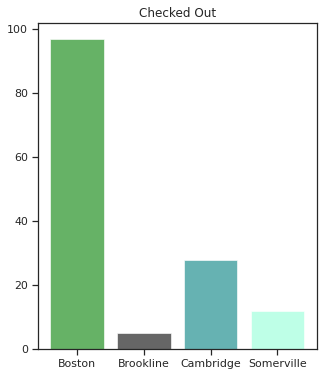

In [98]:
fig, ax = plt.subplots(figsize=(5, 6))


ax.bar(range(4),municipal_counts[1], color=[ 'green','black', 'teal','#93ffd7'],alpha=0.6)
ax.set_xticks([0, 1, 2,3])
ax.set_xticklabels(np.unique(stations_data["municipal"].values))
ax.set_title('Checked Out')


In [99]:
check_out_hours = data['start_date'].apply(lambda s: int(s[-8:-6]))
check_out_hours

0          10
1          10
2          10
3          10
4          10
           ..
1579020    23
1579021    23
1579022    23
1579023    23
1579024    23
Name: start_date, Length: 1579025, dtype: int64

### When? When are the bikes being checked out?
Refine into specific hypotheses:

• More during the weekend than on the weekdays?

• More during rush hour?

• More during the summer than the fall?

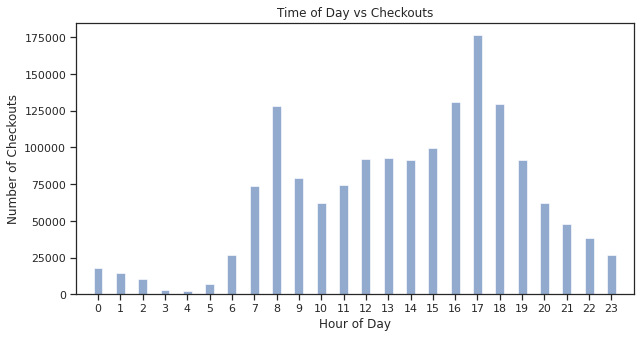

In [100]:
fig,ax=plt.subplots(1,1,figsize=(10,5))

check_out_counts=np.unique(check_out_hours,return_counts=True)
ax.bar(check_out_counts[0], check_out_counts[1], align='center', width=0.4, alpha=0.6)

ax.set_xlim([-1, 24])
ax.set_xticks(range(24))
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Checkouts')
ax.set_title('Time of Day vs Checkouts')

plt.show()

In [115]:
weeks=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"];

In [129]:
day=pd.to_datetime(data["start_date"]).dt.dayofweek
day

0          3
1          3
2          3
3          3
4          3
          ..
1579020    5
1579021    5
1579022    5
1579023    5
1579024    5
Name: start_date, Length: 1579025, dtype: int64

In [131]:
data["Day"]=day

In [137]:
data.head()

,seq_id,hubway_id,status,duration,start_date,strt_statn,end_date,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,Day
0,1,8,Closed,9,7/28/2011 10:12:00,23.0,2011-07-28 10:12:00,23.0,B00468,Registered,'97217,1976.0,Male,3
1,2,9,Closed,220,7/28/2011 10:21:00,23.0,2011-07-28 10:25:00,23.0,B00554,Registered,'02215,1966.0,Male,3
2,3,10,Closed,56,7/28/2011 10:33:00,23.0,2011-07-28 10:34:00,23.0,B00456,Registered,'02108,1943.0,Male,3
3,4,11,Closed,64,7/28/2011 10:35:00,23.0,2011-07-28 10:36:00,23.0,B00554,Registered,'02116,1981.0,Female,3
4,5,12,Closed,12,7/28/2011 10:37:00,23.0,2011-07-28 10:37:00,23.0,B00554,Registered,'97214,1983.0,Female,3


In [216]:
data['end_date'] = pd.to_datetime(data['end_date'], format='%m/%d/%Y %H:%M:%S')

In [217]:
trips_final_day=data.set_index("end_date").resample("D").count()
trips_final_day=trips_final_day["duration"]

In [218]:

#Grouping by day of week in order and getting the net trips per day
trips_per_days_week=trips_final_day.groupby(trips_final_day.index.dayofweek).sum()
trips_per_days_week

end_date
0    230549
1    231785
2    238615
3    234869
4    230906
5    215591
6    196710
Name: duration, dtype: int64

In [219]:
trips_per_days_week.index.name = 'Day'
trips_per_days_week = trips_per_days_week.rename('Trips')
trips_per_days_week

Day
0    230549
1    231785
2    238615
3    234869
4    230906
5    215591
6    196710
Name: Trips, dtype: int64

In [220]:
days = np.array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
trips_per_days_week.index = days
trips_per_days_week

Monday       230549
Tuesday      231785
Wednesday    238615
Thursday     234869
Friday       230906
Saturday     215591
Sunday       196710
Name: Trips, dtype: int64

In [221]:
trips_per_days_week[trips_per_days_week == trips_per_days_week.max()]


Wednesday    238615
Name: Trips, dtype: int64

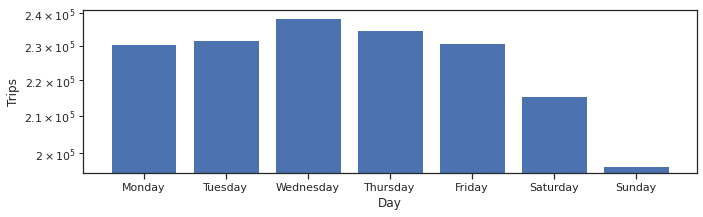

In [222]:
fig=plt.figure(num=None, figsize=(11, 3))

plt.bar(trips_per_days_week.index.values,trips_per_days_week,log=True);
plt.ylabel('Trips');
plt.xlabel('Day');


In [213]:
def getSeason(x):
    return (x%12 + 3)//3
seasons=data.set_index("end_date").resample('M').count()


,seq_id,hubway_id,status,duration,start_date,strt_statn,end_statn,bike_nr,subsc_type,zip_code,birth_date,gender,Day,Season
end_date,,,,,,,,,,,,,,
2011-07-31,2738,2738,2738,2738,2738,2738,2737,2725,2738,627,627,627,2738,2738
2011-08-31,36614,36614,36614,36614,36614,36614,36611,36359,36614,16022,15982,16022,36614,36614
2011-09-30,39372,39372,39372,39372,39372,39372,39371,39238,39372,21442,21139,21442,39372,39372
2011-10-31,36636,36636,36636,36636,36636,36636,36636,36572,36636,23373,23081,23374,36636,36636
2011-11-30,25141,25141,25141,25141,25141,25141,25141,25141,25141,18114,17869,18114,25141,25141
2011-12-31,19,19,19,19,19,19,8,19,19,4,4,4,19,19
2012-01-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2012-02-29,1,1,1,1,1,1,1,1,1,0,0,0,1,1
2012-03-31,14435,14435,14435,14435,14435,14435,14433,14435,14435,10367,10276,10367,14435,14435


In [214]:
seasons_data=seasons["duration"]
seasons_data

end_date
2011-07-31      2738
2011-08-31     36614
2011-09-30     39372
2011-10-31     36636
2011-11-30     25141
2011-12-31        19
2012-01-31         0
2012-02-29         1
2012-03-31     14435
2012-04-30     44491
2012-05-31     53801
2012-06-30     55982
2012-07-31     70458
2012-08-31     85358
2012-09-30     84231
2012-10-31     77363
2012-11-30     47710
2012-12-31         0
2013-01-31         0
2013-02-28         0
2013-03-31         0
2013-04-30     64089
2013-05-31     98312
2013-06-30    109406
2013-07-31    132062
2013-08-31    148598
2013-09-30    140168
2013-10-31    139181
2013-11-30     72858
2013-12-31         1
Freq: M, Name: duration, dtype: int64

In [215]:
seasons_name=["Winter","Spring","Summer","Fall"]

In [224]:
trips_per_month=seasons_data.groupby(seasons_data.index.month).sum()
trips_per_month

end_date
1          0
2          1
3      14435
4     108580
5     152113
6     165388
7     205258
8     270570
9     263771
10    253180
11    145709
12        20
Name: duration, dtype: int64

In [233]:
trips_per_month.index.name = 'Month'
trips_per_month= trips_per_month.rename('Trips')
trips_per_month

Month
1          0
2          1
3      14435
4     108580
5     152113
6     165388
7     205258
8     270570
9     263771
10    253180
11    145709
12        20
Name: Trips, dtype: int64

In [230]:
trips_per_season=trips_per_month.groupby(getSeason(trips_per_month.index)).sum()

In [245]:
trips_per_season.index=season
trips_per_season

Winter        21
Spring    275128
Summer    641216
Fall      662660
Name: Trips, dtype: int64

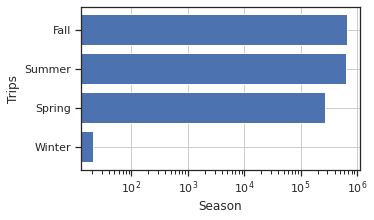

In [265]:
fig=plt.figure(figsize=(5, 3))
plt.barh(trips_per_season.index.values,trips_per_season, log=True)
plt.ylabel('Trips')
plt.xlabel('Season')

plt.grid(True)
